# MACHINE LEARNING PREDICTION MODEL

# Seismic Aftershock Predicition

We are looking to predict based on a 

In [11]:
import pandas as pd
import numpy as np
import datetime as dt
import sklearn

from google.cloud import bigquery
from google.oauth2 import service_account


We are going to work with the earthquake_deduped dataset stored in Google BigQuery

In [12]:
# Import 'earthquake_deduped' data from our database in Google BigQuery:

project_id = 'seismic-alert-system'

credentials = service_account.Credentials.from_service_account_file('G:\Mi unidad\Henry\Data Science\Henry Labs\seismic-alert-system-cbd570f67095.json')
client = bigquery.Client(project=project_id, location='southamerica-east1', credentials=credentials)


# Get the table from BigQuery
table = client.get_table("seismic-alert-system.seismic_datawarehouse.earthquake_deduped")


# Convert it to dataframe
eartqk = client.list_rows(table).to_dataframe()


eartqk

,time,place,mag,magType,depth,latitude,longitude
0,1977-11-17 07:00:37.800,"64 km WSW of Coquimbo, Chile",NaN,None,33.0,-30.078,-71.993
1,1983-03-05 05:13:43.770,"61 km N of Calama, Chile",NaN,None,140.4,-21.908,-68.809
2,1985-05-13 09:01:19.090,"42 km WSW of San Antonio, Chile",NaN,None,33.0,-33.709,-72.041
3,1984-03-20 05:38:49.300,"38 km ENE of Chicureo Abajo, Chile",NaN,None,10.0,-33.215,-70.252
4,1996-09-19 03:53:42.290,"156 km SE of Nichinan, Japan",NaN,None,33.0,30.771,132.691
...,...,...,...,...,...,...,...
84924,2019-01-20 01:32:52.480,"10 km SSW of Coquimbo, Chile",6.7,mww,63.0,-30.0404,-71.3815
84925,2015-09-17 04:10:27.780,"61 km WNW of Illapel, Chile",6.7,mww,23.0,-31.5173,-71.804
84926,2011-02-14 03:40:09.920,"38 km W of Constitución, Chile",6.7,mww,21.0,-35.38,-72.834
84927,2011-01-02 20:20:17.780,"42 km NNW of Carahue, Chile",7.2,mww,24.0,-38.355,-73.326


In [13]:
eartqk.to_csv('earthquake_deduped.csv')

In [14]:
# We are interested on the data that has not null magnitude data

eartqk= eartqk[eartqk['mag'].notna()]

In [15]:
eartqk['mag'].isna().sum()

0

In [16]:
eartqk.sort_values('time')

,time,place,mag,magType,depth,latitude,longitude
78282,1920-08-20 16:15:42.640,"19 km SW of Angol, Chile",6.95,mw,15.00,-37.911,-72.887
77578,1920-10-22 12:09:55.010,"152 km WNW of Tocopilla, Chile",6.59,mw,15.00,-21.602,-71.579
77333,1920-12-10 04:25:49.770,"50 km SSW of Carahue, Chile",7.29,mw,25.00,-39.102,-73.462
77517,1922-03-12 16:51:54.650,"72 km SW of Carahue, Chile",6.56,mw,35.00,-39.205,-73.714
77705,1922-05-21 15:40:42.150,"187 km NW of Constitución, Chile",6.10,mw,15.00,-34.101,-73.819
...,...,...,...,...,...,...,...
71325,2022-12-09 06:12:08.278,"31 km NNW of Glacier View, Alaska",3.00,ml,33.10,62.0529,-147.9447
84176,2022-12-09 06:32:59.718,"97 km NE of Cabatuan, Philippines",5.80,mww,10.00,13.1679,125.8343
60291,2022-12-09 06:36:30.260,"8km NW of The Geysers, CA",0.73,md,1.89,38.8339996,-122.8181686
75513,2022-12-09 06:47:39.696,"18 km N of Moapa Town, Nevada",2.10,ml,10.00,36.8451,-114.5796


In [17]:
# We will filter this with year +1960:

eartqk = eartqk[eartqk['time'].dt.year >= 1960]

In [18]:
# In order to relate both datasets, we must change the date format into only days. 
# We will first convert the datetime into a string with the desired format and then reconvert it to a datetime dtype. 

eartqk['time']=(eartqk['time']).dt.strftime('%Y-%m-%d')

In [19]:
eartqk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72958 entries, 11830 to 84928
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       72958 non-null  object 
 1   place      72958 non-null  object 
 2   mag        72958 non-null  float64
 3   magType    71867 non-null  object 
 4   depth      72958 non-null  float64
 5   latitude   72958 non-null  object 
 6   longitude  72958 non-null  object 
dtypes: float64(2), object(5)
memory usage: 4.5+ MB


In [20]:
eartqk['time']=pd.to_datetime(eartqk['time'], format='%Y-%m-%d')
eartqk

,time,place,mag,magType,depth,latitude,longitude
11830,2003-04-25,"31 km SE of Puente Alto, Chile",0.0,None,108.2,-33.78,-70.308
11831,2003-09-10,"Izu Islands, Japan region",0.0,None,33.0,32.308,141.441
11832,2003-08-12,"194 km S of Shimoda, Japan",0.0,None,176.5,32.924,139.092
11833,2003-11-18,"61 km SSE of Shimoda, Japan",0.0,None,33.0,34.137,139.081
11834,2003-10-31,"42 km SSW of Monte Patria, Chile",0.0,None,71.4,-31.055,-71.112
...,...,...,...,...,...,...,...
84924,2019-01-20,"10 km SSW of Coquimbo, Chile",6.7,mww,63.0,-30.0404,-71.3815
84925,2015-09-17,"61 km WNW of Illapel, Chile",6.7,mww,23.0,-31.5173,-71.804
84926,2011-02-14,"38 km W of Constitución, Chile",6.7,mww,21.0,-35.38,-72.834
84927,2011-01-02,"42 km NNW of Carahue, Chile",7.2,mww,24.0,-38.355,-73.326


In [21]:
replica= eartqk.copy(deep=True)
replica

,time,place,mag,magType,depth,latitude,longitude
11830,2003-04-25,"31 km SE of Puente Alto, Chile",0.0,None,108.2,-33.78,-70.308
11831,2003-09-10,"Izu Islands, Japan region",0.0,None,33.0,32.308,141.441
11832,2003-08-12,"194 km S of Shimoda, Japan",0.0,None,176.5,32.924,139.092
11833,2003-11-18,"61 km SSE of Shimoda, Japan",0.0,None,33.0,34.137,139.081
11834,2003-10-31,"42 km SSW of Monte Patria, Chile",0.0,None,71.4,-31.055,-71.112
...,...,...,...,...,...,...,...
84924,2019-01-20,"10 km SSW of Coquimbo, Chile",6.7,mww,63.0,-30.0404,-71.3815
84925,2015-09-17,"61 km WNW of Illapel, Chile",6.7,mww,23.0,-31.5173,-71.804
84926,2011-02-14,"38 km W of Constitución, Chile",6.7,mww,21.0,-35.38,-72.834
84927,2011-01-02,"42 km NNW of Carahue, Chile",7.2,mww,24.0,-38.355,-73.326


In [22]:
# We need to implement a mechanism where we can relate an seism event with an earthquake that occurred at maximum 10 days earlier. 
# For this, we create columns that specifies the previous days 

for i in range (0,11):
        
    replica['time_'+ (str(i))]= ((replica['time']) - dt.timedelta(days=i))

replica

,time,place,mag,magType,depth,latitude,longitude,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10
11830,2003-04-25,"31 km SE of Puente Alto, Chile",0.0,None,108.2,-33.78,-70.308,2003-04-25,2003-04-24,2003-04-23,2003-04-22,2003-04-21,2003-04-20,2003-04-19,2003-04-18,2003-04-17,2003-04-16,2003-04-15
11831,2003-09-10,"Izu Islands, Japan region",0.0,None,33.0,32.308,141.441,2003-09-10,2003-09-09,2003-09-08,2003-09-07,2003-09-06,2003-09-05,2003-09-04,2003-09-03,2003-09-02,2003-09-01,2003-08-31
11832,2003-08-12,"194 km S of Shimoda, Japan",0.0,None,176.5,32.924,139.092,2003-08-12,2003-08-11,2003-08-10,2003-08-09,2003-08-08,2003-08-07,2003-08-06,2003-08-05,2003-08-04,2003-08-03,2003-08-02
11833,2003-11-18,"61 km SSE of Shimoda, Japan",0.0,None,33.0,34.137,139.081,2003-11-18,2003-11-17,2003-11-16,2003-11-15,2003-11-14,2003-11-13,2003-11-12,2003-11-11,2003-11-10,2003-11-09,2003-11-08
11834,2003-10-31,"42 km SSW of Monte Patria, Chile",0.0,None,71.4,-31.055,-71.112,2003-10-31,2003-10-30,2003-10-29,2003-10-28,2003-10-27,2003-10-26,2003-10-25,2003-10-24,2003-10-23,2003-10-22,2003-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84924,2019-01-20,"10 km SSW of Coquimbo, Chile",6.7,mww,63.0,-30.0404,-71.3815,2019-01-20,2019-01-19,2019-01-18,2019-01-17,2019-01-16,2019-01-15,2019-01-14,2019-01-13,2019-01-12,2019-01-11,2019-01-10
84925,2015-09-17,"61 km WNW of Illapel, Chile",6.7,mww,23.0,-31.5173,-71.804,2015-09-17,2015-09-16,2015-09-15,2015-09-14,2015-09-13,2015-09-12,2015-09-11,2015-09-10,2015-09-09,2015-09-08,2015-09-07
84926,2011-02-14,"38 km W of Constitución, Chile",6.7,mww,21.0,-35.38,-72.834,2011-02-14,2011-02-13,2011-02-12,2011-02-11,2011-02-10,2011-02-09,2011-02-08,2011-02-07,2011-02-06,2011-02-05,2011-02-04
84927,2011-01-02,"42 km NNW of Carahue, Chile",7.2,mww,24.0,-38.355,-73.326,2011-01-02,2011-01-01,2010-12-31,2010-12-30,2010-12-29,2010-12-28,2010-12-27,2010-12-26,2010-12-25,2010-12-24,2010-12-23


In [23]:
# We will keep the aftershock values that represent a danger to the civilian population. That would be a magnitude higher than 4.5

replica = replica[(replica['mag']>=4.5)]

In [24]:
replica

,time,place,mag,magType,depth,latitude,longitude,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10
13227,2009-08-01,"109 km SE of San Pedro de Atacama, Chile",4.5,m,241.9,-23.549,-67.386,2009-08-01,2009-07-31,2009-07-30,2009-07-29,2009-07-28,2009-07-27,2009-07-26,2009-07-25,2009-07-24,2009-07-23,2009-07-22
13228,2009-10-09,"84 km WSW of San Pedro de Atacama, Chile",4.5,m,96.3,-23.242,-68.948,2009-10-09,2009-10-08,2009-10-07,2009-10-06,2009-10-05,2009-10-04,2009-10-03,2009-10-02,2009-10-01,2009-09-30,2009-09-29
13229,2009-11-09,"29 km ESE of Calama, Chile",4.5,m,125.0,-22.565,-68.665,2009-11-09,2009-11-08,2009-11-07,2009-11-06,2009-11-05,2009-11-04,2009-11-03,2009-11-02,2009-11-01,2009-10-31,2009-10-30
13230,2007-05-20,"38 km NNE of La Serena, Chile",4.5,m,51.7,-29.582,-71.093,2007-05-20,2007-05-19,2007-05-18,2007-05-17,2007-05-16,2007-05-15,2007-05-14,2007-05-13,2007-05-12,2007-05-11,2007-05-10
13231,2007-07-22,"120 km E of Diego de Almagro, Chile",4.5,m,120.0,-26.212,-68.857,2007-07-22,2007-07-21,2007-07-20,2007-07-19,2007-07-18,2007-07-17,2007-07-16,2007-07-15,2007-07-14,2007-07-13,2007-07-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84924,2019-01-20,"10 km SSW of Coquimbo, Chile",6.7,mww,63.0,-30.0404,-71.3815,2019-01-20,2019-01-19,2019-01-18,2019-01-17,2019-01-16,2019-01-15,2019-01-14,2019-01-13,2019-01-12,2019-01-11,2019-01-10
84925,2015-09-17,"61 km WNW of Illapel, Chile",6.7,mww,23.0,-31.5173,-71.804,2015-09-17,2015-09-16,2015-09-15,2015-09-14,2015-09-13,2015-09-12,2015-09-11,2015-09-10,2015-09-09,2015-09-08,2015-09-07
84926,2011-02-14,"38 km W of Constitución, Chile",6.7,mww,21.0,-35.38,-72.834,2011-02-14,2011-02-13,2011-02-12,2011-02-11,2011-02-10,2011-02-09,2011-02-08,2011-02-07,2011-02-06,2011-02-05,2011-02-04
84927,2011-01-02,"42 km NNW of Carahue, Chile",7.2,mww,24.0,-38.355,-73.326,2011-01-02,2011-01-01,2010-12-31,2010-12-30,2010-12-29,2010-12-28,2010-12-27,2010-12-26,2010-12-25,2010-12-24,2010-12-23


In [25]:
eartqk

,time,place,mag,magType,depth,latitude,longitude
11830,2003-04-25,"31 km SE of Puente Alto, Chile",0.0,None,108.2,-33.78,-70.308
11831,2003-09-10,"Izu Islands, Japan region",0.0,None,33.0,32.308,141.441
11832,2003-08-12,"194 km S of Shimoda, Japan",0.0,None,176.5,32.924,139.092
11833,2003-11-18,"61 km SSE of Shimoda, Japan",0.0,None,33.0,34.137,139.081
11834,2003-10-31,"42 km SSW of Monte Patria, Chile",0.0,None,71.4,-31.055,-71.112
...,...,...,...,...,...,...,...
84924,2019-01-20,"10 km SSW of Coquimbo, Chile",6.7,mww,63.0,-30.0404,-71.3815
84925,2015-09-17,"61 km WNW of Illapel, Chile",6.7,mww,23.0,-31.5173,-71.804
84926,2011-02-14,"38 km W of Constitución, Chile",6.7,mww,21.0,-35.38,-72.834
84927,2011-01-02,"42 km NNW of Carahue, Chile",7.2,mww,24.0,-38.355,-73.326


In [26]:
replica_chile = replica[replica['place'].str.contains(" Chile")]
eartqk_chile = eartqk[eartqk['place'].str.contains(" Chile")]

In [72]:
# Now we can merge the datasets with another copy of it's own, where one of the columns time_i ( i = 1,2,...,10 ) is the same as eartqk['time']

df_merged = pd.merge(eartqk_chile, replica_chile, left_on='time', right_on='time_0')

for i in range (1,11):
    temp = pd.merge(eartqk_chile, replica_chile, left_on='time', right_on='time_'+ (str(i)))
    df_merged = pd.concat([df_merged, temp])
    df_merged = df_merged.drop_duplicates()
    df_merged = df_merged [df_merged['mag_x'] > df_merged['mag_y']]
    
    

In [73]:
df_merged

,time_x,place_x,mag_x,magType_x,depth_x,latitude_x,longitude_x,time_y,place_y,mag_y,...,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10
54,2003-06-20,"39 km WSW of Ovalle, Chile",5.2,mb,38.30,-30.722,-71.591,2003-06-20,"56 km WSW of Ovalle, Chile",4.6,...,2003-06-19,2003-06-18,2003-06-17,2003-06-16,2003-06-15,2003-06-14,2003-06-13,2003-06-12,2003-06-11,2003-06-10
56,2003-06-20,"39 km WSW of Ovalle, Chile",5.2,mb,38.30,-30.722,-71.591,2003-06-20,"60 km WSW of Ovalle, Chile",4.7,...,2003-06-19,2003-06-18,2003-06-17,2003-06-16,2003-06-15,2003-06-14,2003-06-13,2003-06-12,2003-06-11,2003-06-10
299,2003-06-20,"60 km WSW of Ovalle, Chile",4.7,ml,14.70,-30.741,-71.805,2003-06-20,"56 km WSW of Ovalle, Chile",4.6,...,2003-06-19,2003-06-18,2003-06-17,2003-06-16,2003-06-15,2003-06-14,2003-06-13,2003-06-12,2003-06-11,2003-06-10
304,2003-06-20,"42 km W of Ovalle, Chile",6.8,mwc,33.00,-30.608,-71.637,2003-06-20,"56 km WSW of Ovalle, Chile",4.6,...,2003-06-19,2003-06-18,2003-06-17,2003-06-16,2003-06-15,2003-06-14,2003-06-13,2003-06-12,2003-06-11,2003-06-10
305,2003-06-20,"42 km W of Ovalle, Chile",6.8,mwc,33.00,-30.608,-71.637,2003-06-20,"39 km WSW of Ovalle, Chile",5.2,...,2003-06-19,2003-06-18,2003-06-17,2003-06-16,2003-06-15,2003-06-14,2003-06-13,2003-06-12,2003-06-11,2003-06-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42724,2020-02-08,"165 km ESE of Iquique, Chile",5.2,mww,108.34,-20.8279,-68.7137,2020-02-18,"106 km SE of Iquique, Chile",4.5,...,2020-02-17,2020-02-16,2020-02-15,2020-02-14,2020-02-13,2020-02-12,2020-02-11,2020-02-10,2020-02-09,2020-02-08
42725,2020-02-08,"165 km ESE of Iquique, Chile",5.2,mww,108.34,-20.8279,-68.7137,2020-02-18,"80 km WSW of Constitución, Chile",5.0,...,2020-02-17,2020-02-16,2020-02-15,2020-02-14,2020-02-13,2020-02-12,2020-02-11,2020-02-10,2020-02-09,2020-02-08
42726,2020-03-13,"96 km ENE of Iquique, Chile",5.2,mww,102.69,-19.9306,-69.2739,2020-03-23,"47 km SE of Arica, Chile",4.7,...,2020-03-22,2020-03-21,2020-03-20,2020-03-19,2020-03-18,2020-03-17,2020-03-16,2020-03-15,2020-03-14,2020-03-13
42727,2020-02-16,"74 km NE of Calama, Chile",5.2,mww,104.10,-21.932,-68.4679,2020-02-26,"50 km SSW of Ovalle, Chile",4.8,...,2020-02-25,2020-02-24,2020-02-23,2020-02-22,2020-02-21,2020-02-20,2020-02-19,2020-02-18,2020-02-17,2020-02-16


In [74]:
df_merged['days_after'] = (df_merged['time_y'] - df_merged['time_x']).dt.days
df_merged['days_after'].describe()

count    214161.000000
mean          3.104146
std           3.163675
min           0.000000
25%           0.000000
50%           2.000000
75%           6.000000
max          10.000000
Name: days_after, dtype: float64

In [75]:
df_merged = df_merged.drop(columns=['time_0', 'time_1', 'time_2', 'time_3',
       'time_4', 'time_5', 'time_6', 'time_7', 'time_8', 'time_9', 'time_10'], axis=1)
df_merged

,time_x,place_x,mag_x,magType_x,depth_x,latitude_x,longitude_x,time_y,place_y,mag_y,magType_y,depth_y,latitude_y,longitude_y,days_after
54,2003-06-20,"39 km WSW of Ovalle, Chile",5.2,mb,38.30,-30.722,-71.591,2003-06-20,"56 km WSW of Ovalle, Chile",4.6,mb,16.10,-30.707,-71.778,0
56,2003-06-20,"39 km WSW of Ovalle, Chile",5.2,mb,38.30,-30.722,-71.591,2003-06-20,"60 km WSW of Ovalle, Chile",4.7,ml,14.70,-30.741,-71.805,0
299,2003-06-20,"60 km WSW of Ovalle, Chile",4.7,ml,14.70,-30.741,-71.805,2003-06-20,"56 km WSW of Ovalle, Chile",4.6,mb,16.10,-30.707,-71.778,0
304,2003-06-20,"42 km W of Ovalle, Chile",6.8,mwc,33.00,-30.608,-71.637,2003-06-20,"56 km WSW of Ovalle, Chile",4.6,mb,16.10,-30.707,-71.778,0
305,2003-06-20,"42 km W of Ovalle, Chile",6.8,mwc,33.00,-30.608,-71.637,2003-06-20,"39 km WSW of Ovalle, Chile",5.2,mb,38.30,-30.722,-71.591,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42724,2020-02-08,"165 km ESE of Iquique, Chile",5.2,mww,108.34,-20.8279,-68.7137,2020-02-18,"106 km SE of Iquique, Chile",4.5,mwr,86.09,-20.7677,-69.3199,10
42725,2020-02-08,"165 km ESE of Iquique, Chile",5.2,mww,108.34,-20.8279,-68.7137,2020-02-18,"80 km WSW of Constitución, Chile",5.0,mww,10.00,-35.5964,-73.2435,10
42726,2020-03-13,"96 km ENE of Iquique, Chile",5.2,mww,102.69,-19.9306,-69.2739,2020-03-23,"47 km SE of Arica, Chile",4.7,mb,71.92,-18.8106,-70.0228,10
42727,2020-02-16,"74 km NE of Calama, Chile",5.2,mww,104.10,-21.932,-68.4679,2020-02-26,"50 km SSW of Ovalle, Chile",4.8,mwr,48.08,-30.9949,-71.4659,10


In [76]:
df_merged.columns

Index(['time_x', 'place_x', 'mag_x', 'magType_x', 'depth_x', 'latitude_x',
       'longitude_x', 'time_y', 'place_y', 'mag_y', 'magType_y', 'depth_y',
       'latitude_y', 'longitude_y', 'days_after'],
      dtype='object')

In [77]:
import  geopy.distance
import geopandas

def distancer(row):
    coords_x = (row['latitude_x'], row['longitude_x'])
    coords_y = (row['latitude_y'], row['longitude_y'])
    return geopy.distance.geodesic(coords_x, coords_y).km

df_merged['distance'] = df_merged.apply(distancer, axis=1)

df_merged

,time_x,place_x,mag_x,magType_x,depth_x,latitude_x,longitude_x,time_y,place_y,mag_y,magType_y,depth_y,latitude_y,longitude_y,days_after,distance
54,2003-06-20,"39 km WSW of Ovalle, Chile",5.2,mb,38.30,-30.722,-71.591,2003-06-20,"56 km WSW of Ovalle, Chile",4.6,mb,16.10,-30.707,-71.778,0,17.989310
56,2003-06-20,"39 km WSW of Ovalle, Chile",5.2,mb,38.30,-30.722,-71.591,2003-06-20,"60 km WSW of Ovalle, Chile",4.7,ml,14.70,-30.741,-71.805,0,20.602912
299,2003-06-20,"60 km WSW of Ovalle, Chile",4.7,ml,14.70,-30.741,-71.805,2003-06-20,"56 km WSW of Ovalle, Chile",4.6,mb,16.10,-30.707,-71.778,0,4.571197
304,2003-06-20,"42 km W of Ovalle, Chile",6.8,mwc,33.00,-30.608,-71.637,2003-06-20,"56 km WSW of Ovalle, Chile",4.6,mb,16.10,-30.707,-71.778,0,17.409460
305,2003-06-20,"42 km W of Ovalle, Chile",6.8,mwc,33.00,-30.608,-71.637,2003-06-20,"39 km WSW of Ovalle, Chile",5.2,mb,38.30,-30.722,-71.591,0,13.385270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42724,2020-02-08,"165 km ESE of Iquique, Chile",5.2,mww,108.34,-20.8279,-68.7137,2020-02-18,"106 km SE of Iquique, Chile",4.5,mwr,86.09,-20.7677,-69.3199,10,63.462268
42725,2020-02-08,"165 km ESE of Iquique, Chile",5.2,mww,108.34,-20.8279,-68.7137,2020-02-18,"80 km WSW of Constitución, Chile",5.0,mww,10.00,-35.5964,-73.2435,10,1695.460857
42726,2020-03-13,"96 km ENE of Iquique, Chile",5.2,mww,102.69,-19.9306,-69.2739,2020-03-23,"47 km SE of Arica, Chile",4.7,mb,71.92,-18.8106,-70.0228,10,146.836185
42727,2020-02-16,"74 km NE of Calama, Chile",5.2,mww,104.10,-21.932,-68.4679,2020-02-26,"50 km SSW of Ovalle, Chile",4.8,mwr,48.08,-30.9949,-71.4659,10,1047.542093


In [78]:
# Acording to studies, a replica should occur in a range of 100km.

df= df_merged[(df_merged['distance']<=100)]

df



,time_x,place_x,mag_x,magType_x,depth_x,latitude_x,longitude_x,time_y,place_y,mag_y,magType_y,depth_y,latitude_y,longitude_y,days_after,distance
54,2003-06-20,"39 km WSW of Ovalle, Chile",5.2,mb,38.30,-30.722,-71.591,2003-06-20,"56 km WSW of Ovalle, Chile",4.6,mb,16.10,-30.707,-71.778,0,17.989310
56,2003-06-20,"39 km WSW of Ovalle, Chile",5.2,mb,38.30,-30.722,-71.591,2003-06-20,"60 km WSW of Ovalle, Chile",4.7,ml,14.70,-30.741,-71.805,0,20.602912
299,2003-06-20,"60 km WSW of Ovalle, Chile",4.7,ml,14.70,-30.741,-71.805,2003-06-20,"56 km WSW of Ovalle, Chile",4.6,mb,16.10,-30.707,-71.778,0,4.571197
304,2003-06-20,"42 km W of Ovalle, Chile",6.8,mwc,33.00,-30.608,-71.637,2003-06-20,"56 km WSW of Ovalle, Chile",4.6,mb,16.10,-30.707,-71.778,0,17.409460
305,2003-06-20,"42 km W of Ovalle, Chile",6.8,mwc,33.00,-30.608,-71.637,2003-06-20,"39 km WSW of Ovalle, Chile",5.2,mb,38.30,-30.722,-71.591,0,13.385270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42665,2013-01-23,"26 km WSW of Illapel, Chile",4.9,mwr,28.80,-31.699,-71.438,2013-02-02,"61 km NNW of Illapel, Chile",4.6,mb,53.00,-31.126,-71.433,10,63.534062
42692,2018-08-04,"105 km NE of Iquique, Chile",5.2,mwr,84.49,-19.6189,-69.358,2018-08-14,"113 km NE of Iquique, Chile",4.8,mwr,105.14,-19.6,-69.2794,10,8.506661
42698,2017-10-05,"42 km ENE of Calama, Chile",5.5,mww,110.18,-22.3793,-68.5172,2017-10-15,"Antofagasta, Chile",4.5,mb,111.99,-22.7988,-68.9677,10,65.605134
42701,2011-07-16,"32 km SW of San Antonio, Chile",6.0,mww,20.00,-33.819,-71.832,2011-07-26,"90 km N of Constitución, Chile",4.7,mb,33.50,-34.514,-72.457,10,96.250643


In [81]:
df['mag_y'].describe()

count    64674.000000
mean         4.704010
std          0.239369
min          4.500000
25%          4.500000
50%          4.600000
75%          4.800000
max          7.800000
Name: mag_y, dtype: float64

Now we have a complete dataset where we can identify the earthquake and the following aftershock. We will use this information for analysis porpouses. 

In [83]:
df.to_csv('aftershocks.csv', index=False)

For the machine learning development, we will continue with the data preparation. As we only want to know if an earthquake had it's procedent aftershock.

In [84]:
# As we only want to know if this relation occurred, we will work with a binary column named 'triggered_eruption'

df['aftershock'] = 1
df

,time_x,place_x,mag_x,magType_x,depth_x,latitude_x,longitude_x,time_y,place_y,mag_y,magType_y,depth_y,latitude_y,longitude_y,days_after,distance,aftershock
54,2003-06-20,"39 km WSW of Ovalle, Chile",5.2,mb,38.30,-30.722,-71.591,2003-06-20,"56 km WSW of Ovalle, Chile",4.6,mb,16.10,-30.707,-71.778,0,17.989310,1
56,2003-06-20,"39 km WSW of Ovalle, Chile",5.2,mb,38.30,-30.722,-71.591,2003-06-20,"60 km WSW of Ovalle, Chile",4.7,ml,14.70,-30.741,-71.805,0,20.602912,1
299,2003-06-20,"60 km WSW of Ovalle, Chile",4.7,ml,14.70,-30.741,-71.805,2003-06-20,"56 km WSW of Ovalle, Chile",4.6,mb,16.10,-30.707,-71.778,0,4.571197,1
304,2003-06-20,"42 km W of Ovalle, Chile",6.8,mwc,33.00,-30.608,-71.637,2003-06-20,"56 km WSW of Ovalle, Chile",4.6,mb,16.10,-30.707,-71.778,0,17.409460,1
305,2003-06-20,"42 km W of Ovalle, Chile",6.8,mwc,33.00,-30.608,-71.637,2003-06-20,"39 km WSW of Ovalle, Chile",5.2,mb,38.30,-30.722,-71.591,0,13.385270,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42665,2013-01-23,"26 km WSW of Illapel, Chile",4.9,mwr,28.80,-31.699,-71.438,2013-02-02,"61 km NNW of Illapel, Chile",4.6,mb,53.00,-31.126,-71.433,10,63.534062,1
42692,2018-08-04,"105 km NE of Iquique, Chile",5.2,mwr,84.49,-19.6189,-69.358,2018-08-14,"113 km NE of Iquique, Chile",4.8,mwr,105.14,-19.6,-69.2794,10,8.506661,1
42698,2017-10-05,"42 km ENE of Calama, Chile",5.5,mww,110.18,-22.3793,-68.5172,2017-10-15,"Antofagasta, Chile",4.5,mb,111.99,-22.7988,-68.9677,10,65.605134,1
42701,2011-07-16,"32 km SW of San Antonio, Chile",6.0,mww,20.00,-33.819,-71.832,2011-07-26,"90 km N of Constitución, Chile",4.7,mb,33.50,-34.514,-72.457,10,96.250643,1


In [85]:
df.columns

Index(['time_x', 'place_x', 'mag_x', 'magType_x', 'depth_x', 'latitude_x',
       'longitude_x', 'time_y', 'place_y', 'mag_y', 'magType_y', 'depth_y',
       'latitude_y', 'longitude_y', 'days_after', 'distance', 'aftershock'],
      dtype='object')

In [86]:
# We drop all the columns except 'time', 'place' and the 'aftershock' column

df = df.drop(columns= ['mag_x', 'magType_x', 'depth_x', 'latitude_x',
       'longitude_x', 'time_y', 'place_y', 'mag_y', 'magType_y', 'depth_y',
       'latitude_y', 'longitude_y', 'days_after', 'distance', ], axis=1)

df

,time_x,place_x,aftershock
54,2003-06-20,"39 km WSW of Ovalle, Chile",1
56,2003-06-20,"39 km WSW of Ovalle, Chile",1
299,2003-06-20,"60 km WSW of Ovalle, Chile",1
304,2003-06-20,"42 km W of Ovalle, Chile",1
305,2003-06-20,"42 km W of Ovalle, Chile",1
...,...,...,...
42665,2013-01-23,"26 km WSW of Illapel, Chile",1
42692,2018-08-04,"105 km NE of Iquique, Chile",1
42698,2017-10-05,"42 km ENE of Calama, Chile",1
42701,2011-07-16,"32 km SW of San Antonio, Chile",1


In [97]:
df.rename(columns = {'time_x':'time', 'place_x':'place'}, inplace = True)

In [98]:
df2 = df.drop_duplicates()

In [99]:
df2

,time,place,aftershock
54,2003-06-20,"39 km WSW of Ovalle, Chile",1
299,2003-06-20,"60 km WSW of Ovalle, Chile",1
304,2003-06-20,"42 km W of Ovalle, Chile",1
344,2004-08-28,"56 km SE of Chimbarongo, Chile",1
349,2004-08-28,"72 km ESE of Chimbarongo, Chile",1
...,...,...,...
42560,2016-04-15,"63 km WNW of La Ligua, Chile",1
42665,2013-01-23,"26 km WSW of Illapel, Chile",1
42692,2018-08-04,"105 km NE of Iquique, Chile",1
42698,2017-10-05,"42 km ENE of Calama, Chile",1


In [100]:
# We call back the eartqk dataframe

eartqk

,time,place,mag,magType,depth,latitude,longitude
11830,2003-04-25,"31 km SE of Puente Alto, Chile",0.0,None,108.2,-33.78,-70.308
11831,2003-09-10,"Izu Islands, Japan region",0.0,None,33.0,32.308,141.441
11832,2003-08-12,"194 km S of Shimoda, Japan",0.0,None,176.5,32.924,139.092
11833,2003-11-18,"61 km SSE of Shimoda, Japan",0.0,None,33.0,34.137,139.081
11834,2003-10-31,"42 km SSW of Monte Patria, Chile",0.0,None,71.4,-31.055,-71.112
...,...,...,...,...,...,...,...
84924,2019-01-20,"10 km SSW of Coquimbo, Chile",6.7,mww,63.0,-30.0404,-71.3815
84925,2015-09-17,"61 km WNW of Illapel, Chile",6.7,mww,23.0,-31.5173,-71.804
84926,2011-02-14,"38 km W of Constitución, Chile",6.7,mww,21.0,-35.38,-72.834
84927,2011-01-02,"42 km NNW of Carahue, Chile",7.2,mww,24.0,-38.355,-73.326


In [101]:
# We filter only chilean values

earthquakes = eartqk[eartqk['place'].str.contains(" Chile")]
earthquakes

,time,place,mag,magType,depth,latitude,longitude
11830,2003-04-25,"31 km SE of Puente Alto, Chile",0.0,None,108.2,-33.78,-70.308
11834,2003-10-31,"42 km SSW of Monte Patria, Chile",0.0,None,71.4,-31.055,-71.112
11835,2004-03-10,"35 km WNW of Hacienda La Calera, Chile",0.0,None,35.6,-32.63,-71.55
11836,2003-11-02,"103 km SW of Arica, Chile",0.0,None,33.0,-19.121,-71.01
11837,2003-07-27,"39 km ENE of Salamanca, Chile",0.0,None,0.1,-31.649,-70.578
...,...,...,...,...,...,...,...
84924,2019-01-20,"10 km SSW of Coquimbo, Chile",6.7,mww,63.0,-30.0404,-71.3815
84925,2015-09-17,"61 km WNW of Illapel, Chile",6.7,mww,23.0,-31.5173,-71.804
84926,2011-02-14,"38 km W of Constitución, Chile",6.7,mww,21.0,-35.38,-72.834
84927,2011-01-02,"42 km NNW of Carahue, Chile",7.2,mww,24.0,-38.355,-73.326


In [102]:
# We merge this df with the original earthquakes dataset

final_df = pd.merge(earthquakes, df2, on=['time','place'], how = 'left')

final_df

,time,place,mag,magType,depth,latitude,longitude,aftershock
0,2003-04-25,"31 km SE of Puente Alto, Chile",0.0,None,108.2,-33.78,-70.308,NaN
1,2003-10-31,"42 km SSW of Monte Patria, Chile",0.0,None,71.4,-31.055,-71.112,NaN
2,2004-03-10,"35 km WNW of Hacienda La Calera, Chile",0.0,None,35.6,-32.63,-71.55,NaN
3,2003-11-02,"103 km SW of Arica, Chile",0.0,None,33.0,-19.121,-71.01,NaN
4,2003-07-27,"39 km ENE of Salamanca, Chile",0.0,None,0.1,-31.649,-70.578,NaN
...,...,...,...,...,...,...,...,...
40641,2019-01-20,"10 km SSW of Coquimbo, Chile",6.7,mww,63.0,-30.0404,-71.3815,1.0
40642,2015-09-17,"61 km WNW of Illapel, Chile",6.7,mww,23.0,-31.5173,-71.804,1.0
40643,2011-02-14,"38 km W of Constitución, Chile",6.7,mww,21.0,-35.38,-72.834,1.0
40644,2011-01-02,"42 km NNW of Carahue, Chile",7.2,mww,24.0,-38.355,-73.326,1.0


In [104]:
# We complete the missing values of our labelled column 'triggered_eruption' with 0.

final_df ['aftershock'] = final_df ['aftershock'].fillna(0)

final_df

,time,place,mag,magType,depth,latitude,longitude,aftershock
0,2003-04-25,"31 km SE of Puente Alto, Chile",0.0,None,108.2,-33.78,-70.308,0.0
1,2003-10-31,"42 km SSW of Monte Patria, Chile",0.0,None,71.4,-31.055,-71.112,0.0
2,2004-03-10,"35 km WNW of Hacienda La Calera, Chile",0.0,None,35.6,-32.63,-71.55,0.0
3,2003-11-02,"103 km SW of Arica, Chile",0.0,None,33.0,-19.121,-71.01,0.0
4,2003-07-27,"39 km ENE of Salamanca, Chile",0.0,None,0.1,-31.649,-70.578,0.0
...,...,...,...,...,...,...,...,...
40641,2019-01-20,"10 km SSW of Coquimbo, Chile",6.7,mww,63.0,-30.0404,-71.3815,1.0
40642,2015-09-17,"61 km WNW of Illapel, Chile",6.7,mww,23.0,-31.5173,-71.804,1.0
40643,2011-02-14,"38 km W of Constitución, Chile",6.7,mww,21.0,-35.38,-72.834,1.0
40644,2011-01-02,"42 km NNW of Carahue, Chile",7.2,mww,24.0,-38.355,-73.326,1.0


In [105]:
final_df ['aftershock'].unique()

array([0., 1.])

In [106]:
final_df ['aftershock'].sum()

3275.0

# Data Preprocessing

Having performed all the data correlation, we now have a complete labelled dataset we can work with. The next step is to preprocess this data so we can implement different models.

In [107]:
# We count the NaN values 

final_df['mag'].isna().sum()

0

Our machine learning models will not process geographic data, so we will drop the place and coordinates columns.

In [109]:
preprocessing_df = final_df

preprocessing_df = preprocessing_df.drop(columns=['time', 'place', 'latitude', 'longitude'], axis=1)
preprocessing_df

,mag,magType,depth,aftershock
0,0.0,None,108.2,0.0
1,0.0,None,71.4,0.0
2,0.0,None,35.6,0.0
3,0.0,None,33.0,0.0
4,0.0,None,0.1,0.0
...,...,...,...,...
40641,6.7,mww,63.0,1.0
40642,6.7,mww,23.0,1.0
40643,6.7,mww,21.0,1.0
40644,7.2,mww,24.0,1.0


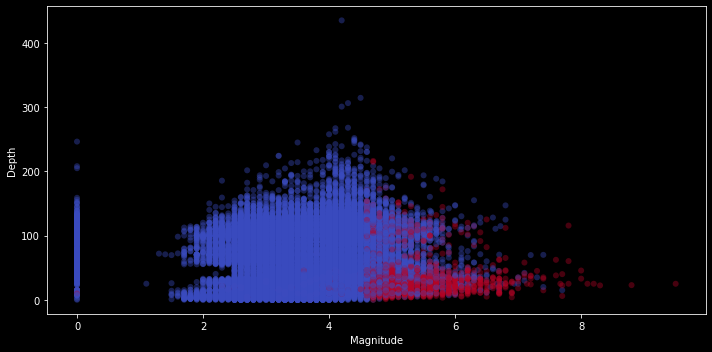

In [111]:
# We plot the distribution into a Magnitude - Depth graph

import matplotlib.pyplot as plt
from matplotlib import cm

from matplotlib import style
style.use ('dark_background')

plt.figure(figsize = (10,5))
plt.scatter(preprocessing_df['mag'], preprocessing_df['depth'], c = preprocessing_df['aftershock'], alpha = 0.4, lw = 0, edgecolor = 'grey', cmap =cm.coolwarm)
plt.xlabel('Magnitude')
plt.ylabel('Depth')
plt.tight_layout()
plt.show()

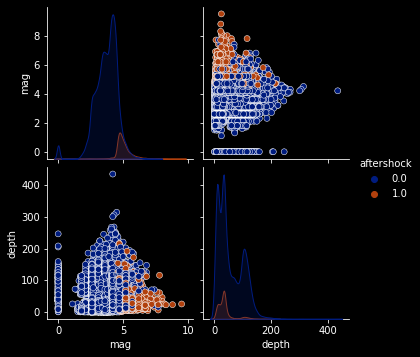

In [112]:
# And a pairplot:

import seaborn as sns

sns.pairplot(preprocessing_df, hue='aftershock', palette='dark')

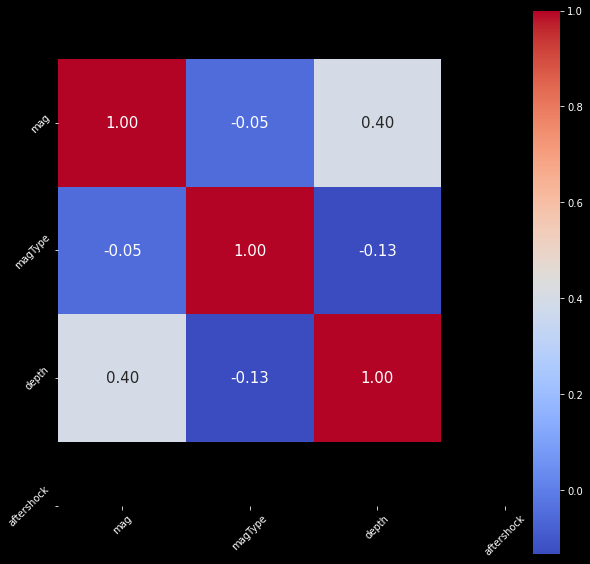

In [113]:
corr = preprocessing_df.corr('pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= preprocessing_df.columns, 
           yticklabels= preprocessing_df.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Before balancing the dataset we will encode the 'magType' column, converting all the string values into something the ML model can operate. We will use OneHotEncoder to create columns of every unique string value. 

In [114]:
# We first divide the dataset into the features and the target:

X = preprocessing_df.drop(columns=['aftershock'], axis=1)

y = preprocessing_df['aftershock']

In [115]:
from sklearn.preprocessing import OneHotEncoder


encoder = sklearn.preprocessing.OneHotEncoder(categories='auto', handle_unknown='error')

encoder.fit (X[['magType']])

OneHotEncoder()

In [116]:
encoder.categories_

[array(['Mb', 'Mw', 'm', 'mb', 'md', 'ml', 'ms', 'mw', 'mwb', 'mwc', 'mwr',
        'mww', None], dtype=object)]

In [117]:
# We create an array with the encoder columns and the original columns

from sklearn.compose import make_column_transformer

column_trans = make_column_transformer((encoder, ['magType']), remainder='passthrough')

In [118]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 ['magType'])])

In [119]:
X = column_trans.fit_transform(X).toarray()

In [120]:
X

array([[  0. ,   0. ,   0. , ...,   1. ,   0. , 108.2],
       [  0. ,   0. ,   0. , ...,   1. ,   0. ,  71.4],
       [  0. ,   0. ,   0. , ...,   1. ,   0. ,  35.6],
       ...,
       [  0. ,   0. ,   0. , ...,   0. ,   6.7,  21. ],
       [  0. ,   0. ,   0. , ...,   0. ,   7.2,  24. ],
       [  0. ,   0. ,   0. , ...,   0. ,   7.7,  22.4]])

Having finished the encoding, we procede with the scaling of the dataset.

In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

Now we split the dataset into to subsets: train and test.

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, stratify= y, random_state=12)

Our last step is to balance the train subset.

In [123]:
y_train.sum()*100/y_train.__len__()

8.055672711935893

We only have 8.055% of cases where an eruption was triggered. This is an extremely unbalanced dataset. Due to the small amount of positive values, we are going to use an oversampling technique where we multiply the positive aftershock cases until we get a perfecly balanced dataset.  

We will use two different methods for upsampling, both of the imblearn library: 

- Random upsampling. Multiplies randomly the positive values we already have.
- SMOPE (Synthetic Minority Oversampling Technique). Creates new neighbors of the positive samples.

We will later analyse which technique presents better results.

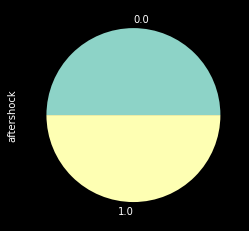

In [124]:
# We will start with the random upsampling.

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1)
X_ros_train , y_ros_train = ros.fit_resample(X_train, y_train)

ax = y_ros_train.value_counts().plot.pie()

<AxesSubplot:ylabel='aftershock'>

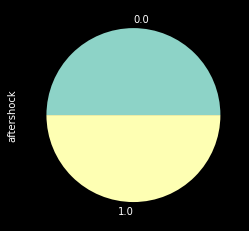

In [125]:
# The other kind of oversampling is SMOPE:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=12)

X_smote_train, y_smote_train = smote.fit_resample(X_train, y_train)

y_smote_train.value_counts().plot.pie()

In [126]:
print (y_ros_train.value_counts(), y_smote_train.value_counts())

0.0    26160
1.0    26160
Name: aftershock, dtype: int64 0.0    26160
1.0    26160
Name: aftershock, dtype: int64


Now that we have completed the preprocessing of the data, we can continue with the development of the ML models.

# Machine Learning Models

We will implement different ML models in order to see which one performs better. This models will be compared with two benchmark model, which will be two fully positive and negative target results.

In [127]:
# We generate a model that will only predict positive triggered eruptions (=0) as a benchmark

import sklearn.metrics as metrics

y_zeros = np.zeros(y_test.shape)
accuracy_zeros = metrics.accuracy_score(y_test,y_zeros)
print(accuracy_zeros)

0.919386583565688


## Logistic regresion

This will be our most basic model, taking into acount only one feature: the seism magnitude.  

In [128]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

In [129]:
# We train the model

LR_ros = LR.fit(X_ros_train, y_ros_train)

LR_smote = LR.fit(X_smote_train, y_smote_train)

In [130]:
# We predict with our trained model:

y_pred_ros = LR.predict(X_test)

y_pred_smote = LR.predict(X_test)

ValueError: x and y must be the same size

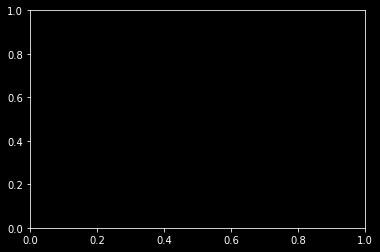

In [131]:
# We plot the results of the prediction

plt.scatter(X_test, y_pred_ros, c= y_pred_ros, alpha = 0.5, lw = 0.5)
#plt.scatter(X_test, y_pred_smote,c=y_pred_smote, alpha = 0.1, lw = 0.5)


plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()

We will evaluate the predictions of the Random Over Sampling dataset: 

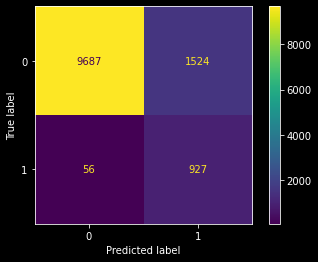

In [132]:
# Confusion matrix:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


matrix = confusion_matrix(y_test, y_pred_ros)

cm_display = ConfusionMatrixDisplay(matrix)

cm_display.plot()
plt.show()

In [133]:
# Accuracy:

from sklearn.metrics import accuracy_score

recall = accuracy_score(y_test, y_pred_ros)
print('Recall: ' + str(recall))


# Precision:

from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred_ros)
print ('Precision: ' + str(precision))

Recall: 0.8704280793833032
Precision: 0.37821297429620565


We will do the same with the SMOTE dataset:

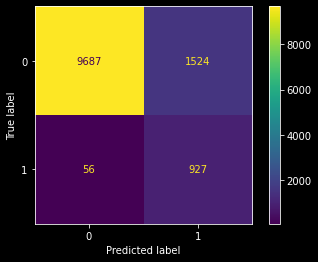

In [134]:
# Confusion matrix:

matrix = confusion_matrix(y_test, y_pred_smote)

cm_display = ConfusionMatrixDisplay(matrix)

cm_display.plot()
plt.show()

In [135]:
# Accuracy:

recall = accuracy_score(y_test, y_pred_smote)
print('Recall: ' + str(recall))


# Precision:

precision = precision_score(y_test, y_pred_smote)
print ('Precision: ' + str(precision))

Recall: 0.8704280793833032
Precision: 0.37821297429620565


There's no improvement using SMOTE. We will continue the process with other models because the metrics are not satisfactory.

# Random Forest

Random Forest is a ensemble learning model. It combines multiple classifies, generally improving performance.

We will first work with the Random oversampled train dataset

In [144]:
from sklearn.ensemble import RandomForestClassifier

randf = RandomForestClassifier(n_estimators=300, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 12)
randf_ros = randf.fit(X_ros_train,y_ros_train)

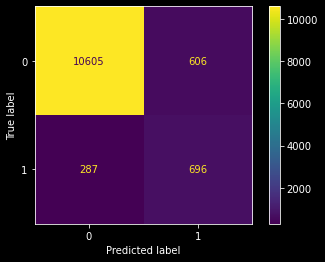

Train Accuracy: 0.9811162079510704
Train Precission: 0.9756613756613757
Test Accuracy: 0.9267672625881581
Test Precission: 0.5345622119815668


In [143]:
y_ros_train_pred = randf.predict(X_ros_train)
y_test_pred = randf.predict(X_test)

matrix = confusion_matrix(y_test, y_test_pred)

cm_display = ConfusionMatrixDisplay(matrix)

cm_display.plot()
plt.show()

print('Train Accuracy: ' + str(metrics.accuracy_score(y_ros_train, y_ros_train_pred)))
print('Train Precission: ' + str(precision_score(y_ros_train, y_ros_train_pred)))
print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, y_test_pred)))
print('Test Precission: ' + str(precision_score(y_test, y_test_pred)))

And with the SMOTE train subset:

In [145]:
randf_smote = randf.fit(X_smote_train, y_smote_train)

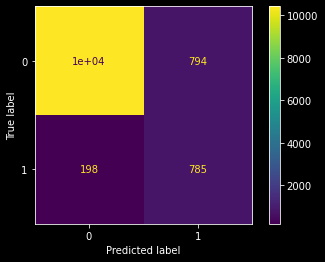

Train Accuracy: 0.9864105504587156
Train Precission: 0.9790309829462034
Test Accuracy: 0.9186485156634411
Test Precission: 0.49715009499683344


In [146]:
y_smote_train_pred = randf_smote.predict(X_smote_train)
y_test_pred = randf_smote.predict(X_test)

matrix = confusion_matrix(y_test, y_test_pred)

cm_display = ConfusionMatrixDisplay(matrix)

cm_display.plot()
plt.show()

print('Train Accuracy: ' + str(metrics.accuracy_score(y_smote_train, y_smote_train_pred)))
print('Train Precission: ' + str(precision_score(y_smote_train, y_smote_train_pred)))
print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, y_test_pred)))
print('Test Precission: ' + str(precision_score(y_test, y_test_pred)))